In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Reading the dataset
df = pd.read_csv('phishing.csv')


In [2]:
#Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235805 entries, 0 to 235804
Data columns (total 52 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235805 non-null  object 
 1   URL                         235805 non-null  object 
 2   URLLength                   235805 non-null  int64  
 3   Domain                      235805 non-null  object 
 4   DomainLength                235805 non-null  int64  
 5   IsDomainIP                  235805 non-null  int64  
 6   TLD                         235805 non-null  object 
 7   URLSimilarityIndex          235805 non-null  float64
 8   TLDLength                   235805 non-null  int64  
 9   NoOfSubDomain               235805 non-null  int64  
 10  HasObfuscation              235805 non-null  int64  
 11  NoOfObfuscatedChar          235805 non-null  int64  
 12  ObfuscationRatio            235805 non-null  float64
 13  NoOfLettersInU

In [3]:
#Printing the main statistics
df.describe()


,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235805.000000,235805.000000,235805.000000,235805.000000,235805.000000,235805.000000,235805.000000,235805.000000,235805.000000,235805.000000,...,235805.000000,235805.000000,235805.000000,209867.000000,235805.000000,235805.000000,235805.000000,235805.000000,235805.000000,235805.000000
mean,34.572770,21.470329,0.002706,78.431693,2.764454,1.164755,0.002057,0.024860,0.000138,19.428676,...,0.237005,0.023477,0.486796,26.116722,6.333203,10.522538,65.071207,2.377583,49.264201,0.571913
std,41.313316,9.150645,0.051945,28.975781,0.599734,0.600960,0.045305,1.876209,0.003817,29.089750,...,0.425246,0.151413,0.499827,79.412167,74.864731,22.311818,176.684033,17.640728,161.025499,0.494803
min,13.000000,4.000000,0.000000,0.155574,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.025835,2.000000,1.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,3.000000,1.000000,0.000000,0.000000,0.000000,14.000000,...,0.000000,0.000000,0.000000,9.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,3.000000,1.000000,0.000000,0.000000,0.000000,20.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,13.000000,10.000000,1.000000,447.000000,0.348000,5191.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


In [4]:
#Printing the unique columns
for col in df.columns.unique():
    print(col,len(df[col].unique()))

FILENAME 235795
URL 235370
URLLength 482
Domain 220086
DomainLength 101
IsDomainIP 2
TLD 695
URLSimilarityIndex 36360
TLDLength 12
NoOfSubDomain 10
HasObfuscation 2
NoOfObfuscatedChar 20
ObfuscationRatio 146
NoOfLettersInURL 421
LetterRatioInURL 685
NoOfDegitsInURL 182
DegitRatioInURL 425
NoOfEqualsInURL 25
NoOfQMarkInURL 6
NoOfAmpersandInURL 31
NoOfOtherSpecialCharsInURL 74
SpacialCharRatioInURL 240
IsHTTPS 2
LineOfCode 10738
LargestLineLength 26181
HasTitle 2
Title 197874
DomainTitleMatchScore 152
HasFavicon 2
Robots 3
IsResponsive 2
NoOfURLRedirect 2
NoOfSelfRedirect 2
HasDescription 2
NoOfPopup 115
NoOfiFrame 120
HasExternalFormSubmit 2
HasSocialNet 2
HasSubmitButton 2
HasHiddenFields 3
HasPasswordField 2
Bank 2
Pay 2
Crypto 2
HasCopyrightInfo 2
NoOfImage 944
NoOfCSS 209
NoOfJS 253
NoOfSelfRef 1374
NoOfEmptyRef 296
NoOfExternalRef 1191
label 2


In [5]:
#Printing the dataset shape and first five rows
print(df.shape)
print(df.head())

(235805, 52)
     FILENAME                                 URL  URLLength  \
0  521848.txt    https://www.southbankmosaics.com         31   
1   31372.txt            https://www.uni-mainz.de         23   
2  597387.txt      https://www.voicefmradio.co.uk         29   
3  554095.txt         https://www.sfnmjournal.com         26   
4  151578.txt  https://www.rewildingargentina.org         33   

                       Domain  DomainLength  IsDomainIP  TLD  \
0    www.southbankmosaics.com            24           0  com   
1            www.uni-mainz.de            16           0   de   
2      www.voicefmradio.co.uk            22           0   uk   
3         www.sfnmjournal.com            19           0  com   
4  www.rewildingargentina.org            26           0  org   

   URLSimilarityIndex  TLDLength  NoOfSubDomain  ...  Pay  Crypto  \
0               100.0          3              1  ...    0       0   
1               100.0          2              1  ...    0       0   
2         

## 1 Remove Uncorrelated features
- Improves model performance by reducing noise and dimensionality.


In [7]:
# Dropping non-numeric columns before calculating the correlation
numeric_df = df.select_dtypes(include=[float, int])


correlation_matrix = numeric_df.corr()


target_correlation = correlation_matrix['label']

threshold = 0.1
uncorrelated_features = target_correlation[target_correlation.abs() < threshold].index

# Drop uncorrelated features from the numeric DataFrame
numeric_df = numeric_df.drop(columns=uncorrelated_features)


print(numeric_df.corr())


print(numeric_df.shape)

non_numeric_df = df.select_dtypes(exclude=[float, int])
df = pd.concat([numeric_df, non_numeric_df], axis=1)

print(df.shape)

                            URLLength  DomainLength  URLSimilarityIndex  \
URLLength                    1.000000      0.243093           -0.421105   
DomainLength                 0.243093      1.000000           -0.420693   
URLSimilarityIndex          -0.421105     -0.420693            1.000000   
NoOfLettersInURL             0.956047      0.277604           -0.449120   
LetterRatioInURL             0.322480      0.549644           -0.491677   
NoOfDegitsInURL              0.835809      0.131709           -0.299592   
DegitRatioInURL              0.314061      0.298389           -0.567217   
NoOfQMarkInURL               0.466385      0.068791           -0.347044   
NoOfOtherSpecialCharsInURL   0.782582      0.272930           -0.540557   
SpacialCharRatioInURL        0.199112      0.182798           -0.604888   
IsHTTPS                      0.013113     -0.019222            0.346400   
LineOfCode                  -0.060638     -0.075170            0.231152   
HasTitle                 

## 2 Handling Missing Values


In [9]:
#Total number of missing values
print(df.isnull().sum())

URLLength                          0
DomainLength                       0
URLSimilarityIndex                 0
NoOfLettersInURL                   0
LetterRatioInURL               82534
NoOfDegitsInURL                    0
DegitRatioInURL               211871
NoOfQMarkInURL                107645
NoOfOtherSpecialCharsInURL         0
SpacialCharRatioInURL              0
IsHTTPS                            0
LineOfCode                         0
HasTitle                           0
DomainTitleMatchScore              0
HasFavicon                         0
Robots                         31756
IsResponsive                       0
HasDescription                     0
NoOfiFrame                      1296
HasExternalFormSubmit              0
HasSocialNet                       0
HasSubmitButton                    0
HasHiddenFields                41972
HasPasswordField                   0
Bank                               0
Pay                                0
HasCopyrightInfo                   0
N

In [10]:
# Drop rows with any missing values
#df = df.dropna()

df_cleaned = df.dropna() 

df.fillna(df.mean(numeric_only = True), inplace = True)

df.isnull().sum()

print(f"Shape after handling missing values: {df.shape}")

print(df.isnull().sum())

Shape after handling missing values: (235805, 38)
URLLength                     0
DomainLength                  0
URLSimilarityIndex            0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfQMarkInURL                0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
HasTitle                      0
DomainTitleMatchScore         0
HasFavicon                    0
Robots                        0
IsResponsive                  0
HasDescription                0
NoOfiFrame                    0
HasExternalFormSubmit         0
HasSocialNet                  0
HasSubmitButton               0
HasHiddenFields               0
HasPasswordField              0
Bank                          0
Pay                           0
HasCopyrightInfo              0
NoOfImage                     0
NoOfJS                        0
NoOfSelfRef           

## 3 Handling Duplicate Entries


In [12]:

# Identify duplicate rows
duplicates = df.duplicated()

# Print duplicate rows
print(duplicates.sum())  

print(df[duplicates])

10
        URLLength  DomainLength  URLSimilarityIndex  NoOfLettersInURL  \
235795         31            24               100.0                18   
235796         23            16               100.0                 9   
235797         29            22               100.0                15   
235798         26            19               100.0                13   
235799         33            26               100.0                20   
235800         30            23               100.0                17   
235801         25            18               100.0                12   
235802         25            18               100.0                12   
235803         29            22               100.0                16   
235804         18            11               100.0                 5   

        LetterRatioInURL  NoOfDegitsInURL  DegitRatioInURL  NoOfQMarkInURL  \
235795          0.515755                0         0.028454        0.000000   
235796          0.515755             

In [13]:
#Removing duplicate values
df.drop_duplicates(inplace=True)


print("Dataset shape after removing duplicates:", df.shape)

print(df[duplicates]) 

Dataset shape after removing duplicates: (235795, 38)
Empty DataFrame
Columns: [URLLength, DomainLength, URLSimilarityIndex, NoOfLettersInURL, LetterRatioInURL, NoOfDegitsInURL, DegitRatioInURL, NoOfQMarkInURL, NoOfOtherSpecialCharsInURL, SpacialCharRatioInURL, IsHTTPS, LineOfCode, HasTitle, DomainTitleMatchScore, HasFavicon, Robots, IsResponsive, HasDescription, NoOfiFrame, HasExternalFormSubmit, HasSocialNet, HasSubmitButton, HasHiddenFields, HasPasswordField, Bank, Pay, HasCopyrightInfo, NoOfImage, NoOfJS, NoOfSelfRef, NoOfEmptyRef, NoOfExternalRef, label, FILENAME, URL, Domain, TLD, Title]
Index: []

[0 rows x 38 columns]


/var/folders/jl/0l159xgn5q9bvjftd2hj2dfr0000gq/T/ipykernel_12951/3116140020.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[duplicates])


## 4 Checking dtypes
- Standardising data types reduces further error

In [15]:
for col in df.columns.unique():
    if len(df[col].unique())<3:
        print(col,df[col].unique())
        df[col] = df[col].astype(bool)
        print(col,df[col].unique())

print(df.dtypes.tail(25))

IsHTTPS [1 0]
IsHTTPS [ True False]
HasTitle [1 0]
HasTitle [ True False]
HasFavicon [0 1]
HasFavicon [False  True]
IsResponsive [1 0]
IsResponsive [ True False]
HasDescription [0 1]
HasDescription [False  True]
HasExternalFormSubmit [0 1]
HasExternalFormSubmit [False  True]
HasSocialNet [0 1]
HasSocialNet [False  True]
HasSubmitButton [1 0]
HasSubmitButton [ True False]
HasPasswordField [0 1]
HasPasswordField [False  True]
Bank [1 0]
Bank [ True False]
Pay [0 1]
Pay [False  True]
HasCopyrightInfo [1 0]
HasCopyrightInfo [ True False]
label [1 0]
label [ True False]
DomainTitleMatchScore    float64
HasFavicon                  bool
Robots                   float64
IsResponsive                bool
HasDescription              bool
NoOfiFrame               float64
HasExternalFormSubmit       bool
HasSocialNet                bool
HasSubmitButton             bool
HasHiddenFields          float64
HasPasswordField            bool
Bank                        bool
Pay                         bool

## 5 Removing outliers

In [17]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

print(df.shape)

outlier_columns = []

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[~((df[col] < lower_bound) | (df[col] > upper_bound))]


print(df.shape)



(235795, 38)
(73200, 38)


## 6 Feature Scaling
- Ensures that no feature dominates another

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for col in numerical_columns:
        df[col] = scaler.fit_transform(df[[col]])
       
columns_to_remove = [col for col in numerical_columns if df[col].nunique() <= 2]
df = df.drop(columns=columns_to_remove)


In [20]:
print(df.shape)


(73200, 35)


## 7 Feature Engineering

In [22]:
def calculate_char_continuation_rate(url):
    char_count = 0
    continuation_count = 0

    for i in range(1, len(url)):
        if url[i] == url[i - 1]: 
            continuation_count += 1
        char_count += 1

    return continuation_count / char_count if char_count > 0 else 0

df['CharContinuationRate'] = df['URL'].apply(calculate_char_continuation_rate)


In [23]:
def calculate_url_title_match_score(url, title):
    url_tokens = set(url.lower().split('.'))  
    title_tokens = set(title.lower().split()) 
    
    # Calculate the ratio of matching tokens
    matching_tokens = url_tokens.intersection(title_tokens)
    score = len(matching_tokens) / len(title_tokens) if title_tokens else 0
    
    return score

df['URLTitleMatchScore'] = df.apply(lambda row: calculate_url_title_match_score(row['URL'], row['Title']), axis=1)


In [24]:
from collections import Counter

# Calculate the character frequency distribution
all_chars = ''.join(df['URL'])
char_freq = Counter(all_chars)
total_chars = sum(char_freq.values())

def calculate_url_char_prob(url):
    prob = 0
    for char in url:
        prob += char_freq[char] / total_chars  
    return prob / len(url) if len(url) > 0 else 0

df['URLCharProb'] = df['URL'].apply(calculate_url_char_prob)


In [25]:
# List of known legitimate TLDs (simplified example)
legitimate_tlds = ['com', 'org', 'net', 'edu', 'gov', 'info', 'io']

def calculate_tld_legitimate_prob(tld):
    return 1.0 if tld in legitimate_tlds else 0.0

df['TLDLegitimateProb'] = df['TLD'].apply(calculate_tld_legitimate_prob)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73200 entries, 0 to 235792
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   URLLength                   73200 non-null  float64
 1   DomainLength                73200 non-null  float64
 2   URLSimilarityIndex          73200 non-null  float64
 3   NoOfLettersInURL            73200 non-null  float64
 4   LetterRatioInURL            73200 non-null  float64
 5   NoOfOtherSpecialCharsInURL  73200 non-null  float64
 6   SpacialCharRatioInURL       73200 non-null  float64
 7   IsHTTPS                     73200 non-null  bool   
 8   LineOfCode                  73200 non-null  float64
 9   HasTitle                    73200 non-null  bool   
 10  DomainTitleMatchScore       73200 non-null  float64
 11  HasFavicon                  73200 non-null  bool   
 12  Robots                      73200 non-null  float64
 13  IsResponsive                73200 n

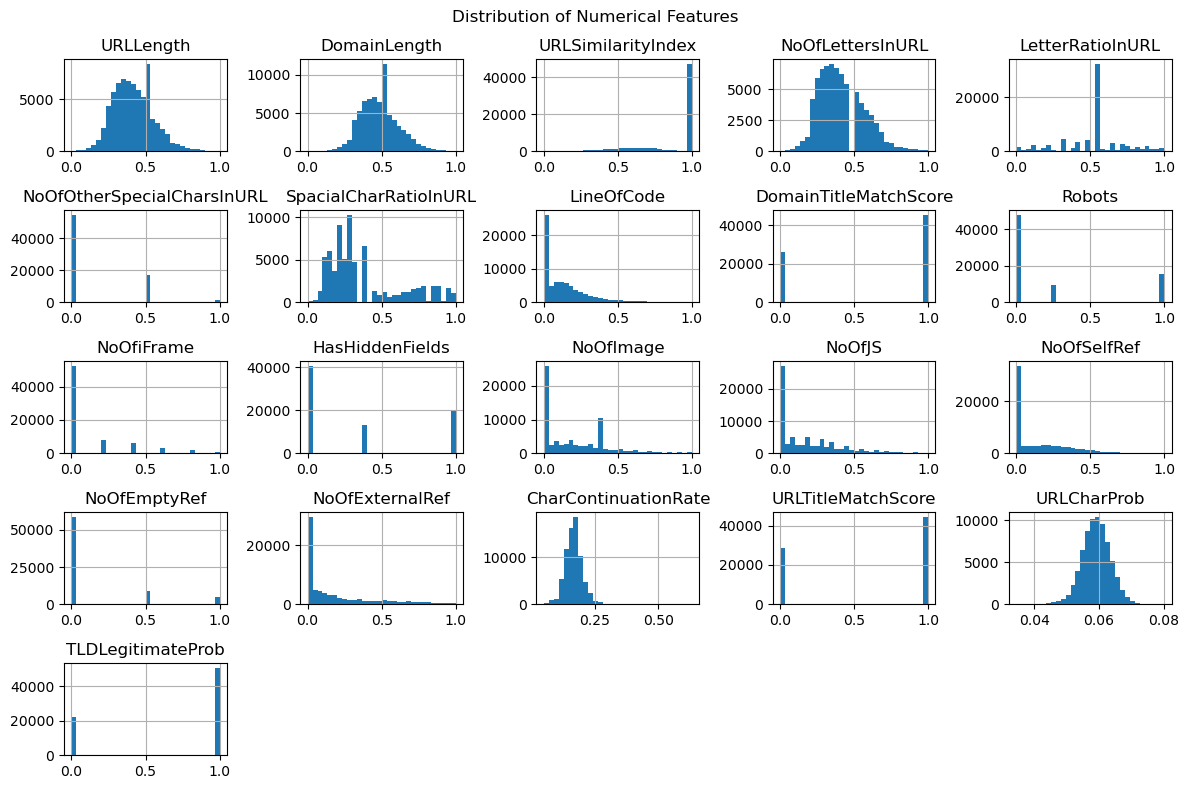

Skewness:
 URLLength                     0.518975
DomainLength                  0.414523
URLSimilarityIndex           -1.213809
NoOfLettersInURL              0.639713
LetterRatioInURL             -0.377885
NoOfOtherSpecialCharsInURL    1.543688
SpacialCharRatioInURL         1.058543
LineOfCode                    1.837851
DomainTitleMatchScore        -0.578079
Robots                        1.265408
NoOfiFrame                    2.070089
HasHiddenFields               0.750164
NoOfImage                     1.017987
NoOfJS                        1.273751
NoOfSelfRef                   1.299542
NoOfEmptyRef                  2.056826
NoOfExternalRef               1.354464
CharContinuationRate          0.343372
URLTitleMatchScore           -0.444125
URLCharProb                  -0.161755
TLDLegitimateProb            -0.837738
dtype: float64


In [27]:
# Histograms to check distribution
df.select_dtypes(include=['int64', 'float64']).hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribution of Numerical Features")
plt.tight_layout()
plt.show()

# Checking skewness
skewness = df.select_dtypes(include=['int64', 'float64']).skew()
print("Skewness:\n", skewness)


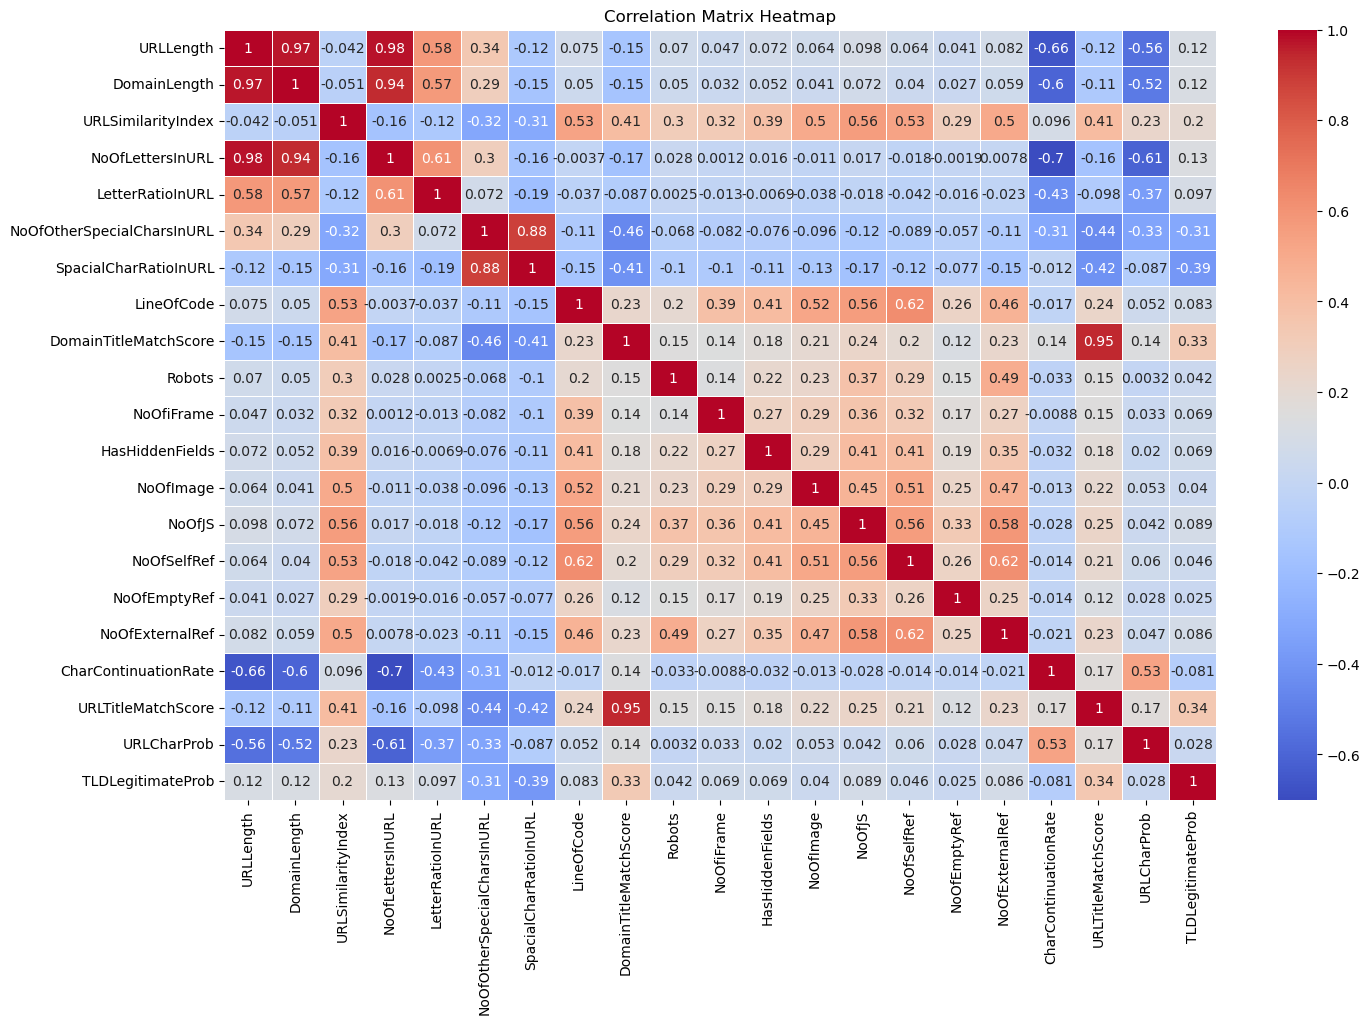

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numeric columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


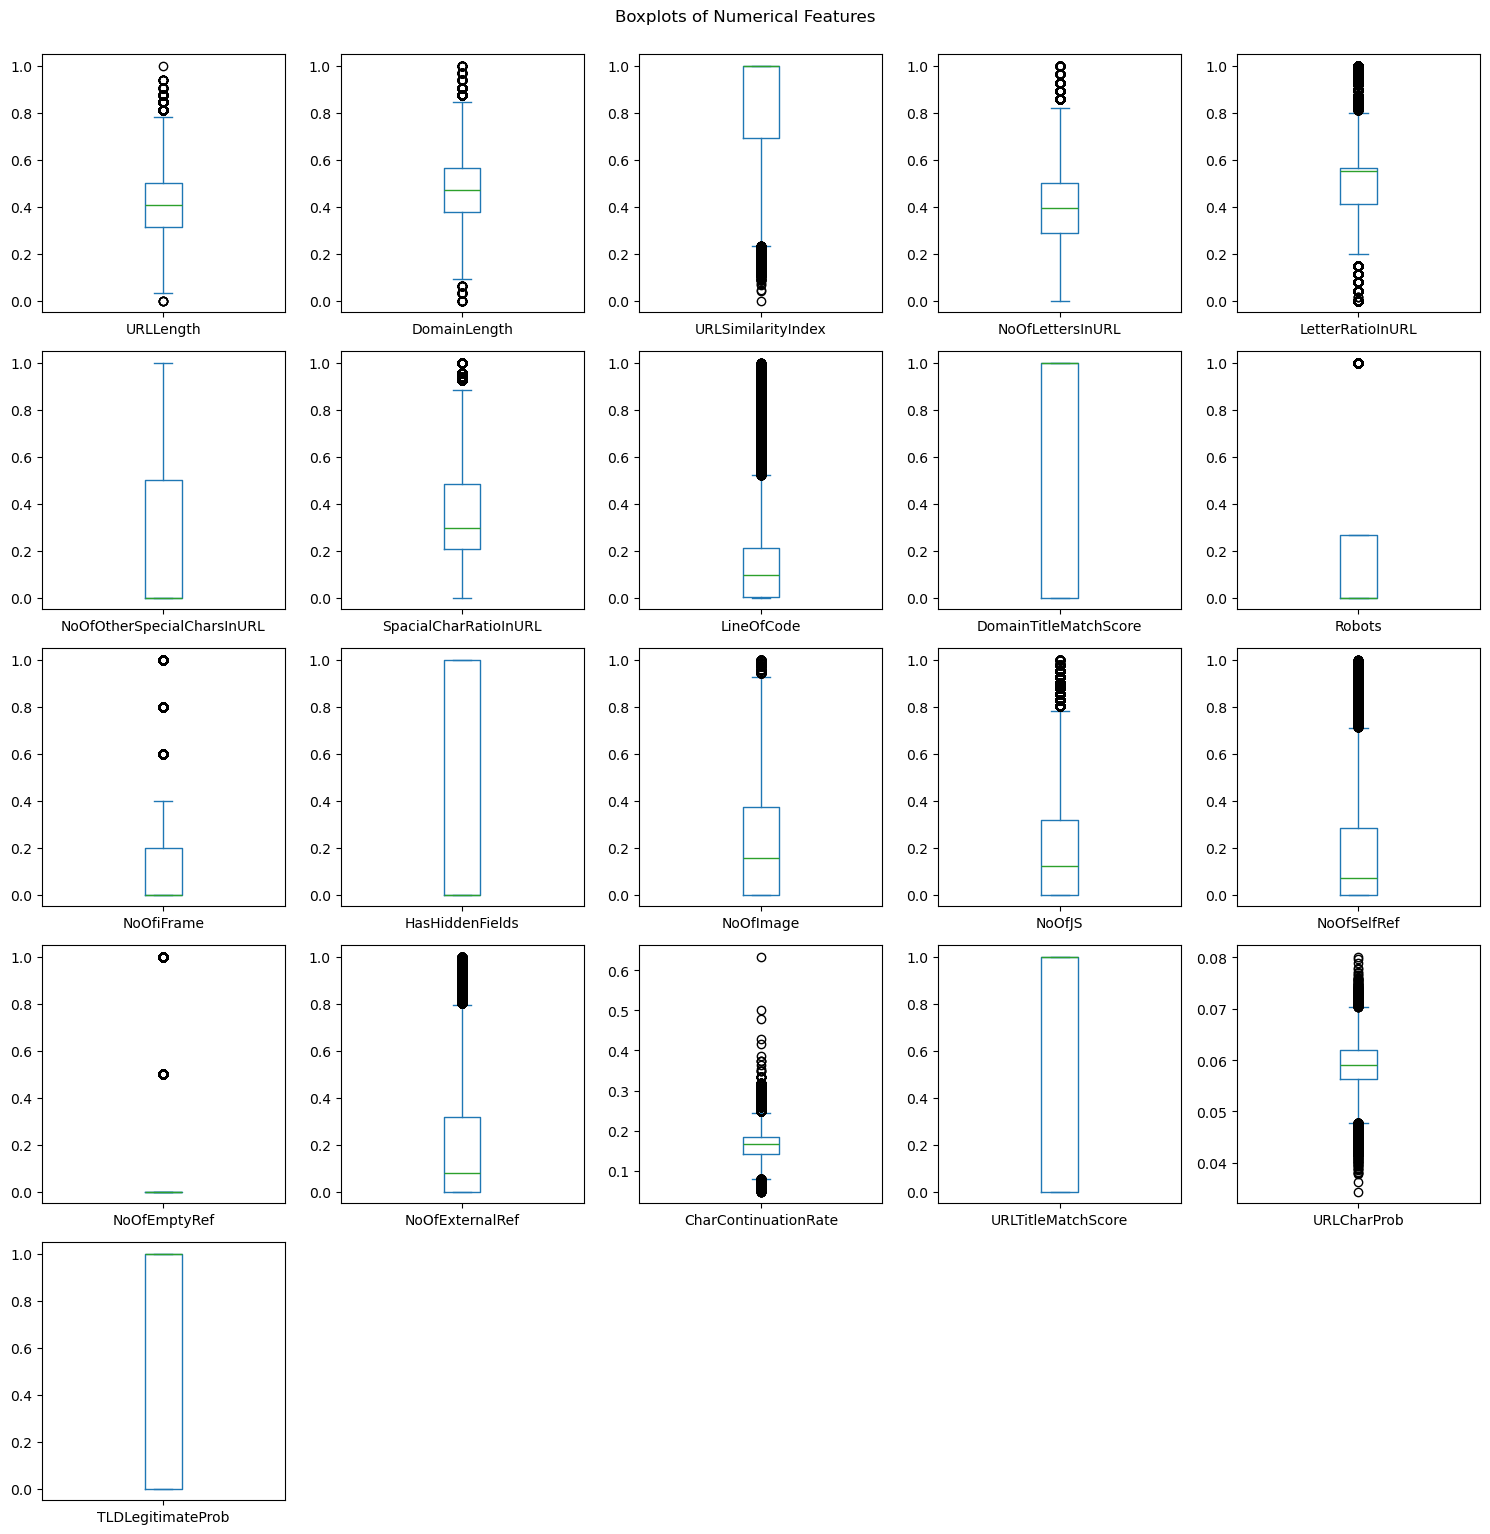

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Count the number of numerical columns
num_features = df.select_dtypes(include=['int64', 'float64']).shape[1]

# Calculate the number of rows and columns needed for subplots
num_cols = 5  # Number of columns for subplots
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division

# Create boxplots for numerical features
df.select_dtypes(include=['int64', 'float64']).plot(
    kind='box', 
    subplots=True, 
    layout=(num_rows, num_cols),  # Update layout based on the number of features
    figsize=(15, num_rows * 3),    # Adjust the figure size for better visibility
    sharex=False, 
    sharey=False
)

plt.tight_layout()
plt.suptitle("Boxplots of Numerical Features", y=1.02)
plt.show()


/var/folders/jl/0l159xgn5q9bvjftd2hj2dfr0000gq/T/ipykernel_12951/3170812458.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette='coolwarm')


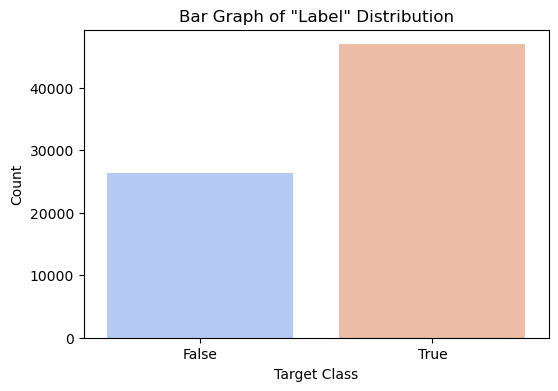

In [30]:
# Bar graph for class distribution
target_counts = df['label'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='coolwarm')
plt.title('Bar Graph of "Label" Distribution')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()


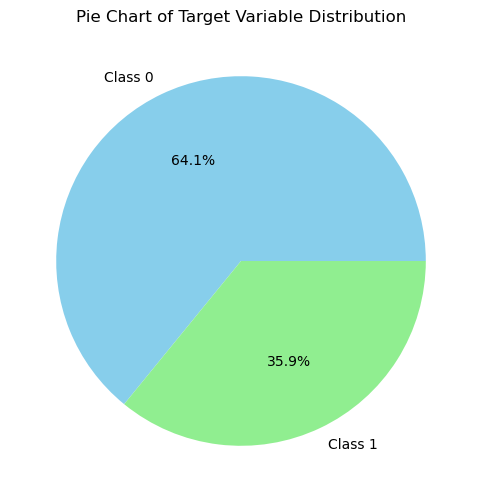

In [31]:
# Pie chart for target class distribution
plt.figure(figsize=(6, 6))
target_counts.plot.pie(autopct='%1.1f%%', labels=['Class 0', 'Class 1'], colors=['skyblue', 'lightgreen'])
plt.title('Pie Chart of Target Variable Distribution')
plt.ylabel('')  # Remove y-axis label for clarity
plt.show()


# knn

In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('phishing.csv')

irrelevant_columns = ['FILENAME', 'URL', 'Domain', 'TLD', 'Title']  
data = data.drop(columns=irrelevant_columns, errors='ignore')

X = data.drop(columns=['label'], errors='ignore') 
y = data['label']
X = X.select_dtypes(include=['float64', 'int64'])
X.fillna(X.mean(), inplace=True)


In [126]:
selected_features = ['URLLength', 'DomainLength', 'URLSimilarityIndex'] 
X = df[selected_features]
y = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#KNN model 
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
 
print('Classification:')
print(classification_report(y_test, y_pred))



Accuracy: 1.00
Classification:
              precision    recall  f1-score   support

       False       1.00      0.99      1.00     13138
        True       1.00      1.00      1.00     23462

    accuracy                           1.00     36600
   macro avg       1.00      1.00      1.00     36600
weighted avg       1.00      1.00      1.00     36600



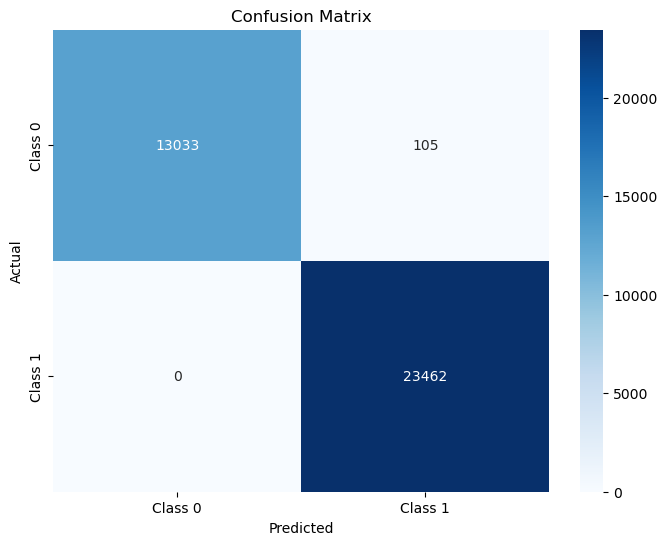

In [127]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


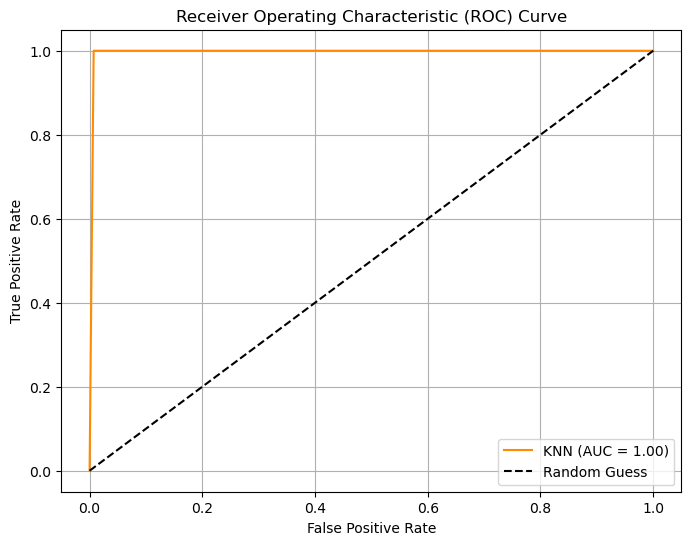

In [128]:
from sklearn.metrics import roc_curve, auc

y_proba = knn.predict_proba(X_test)[:, 1]

#ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


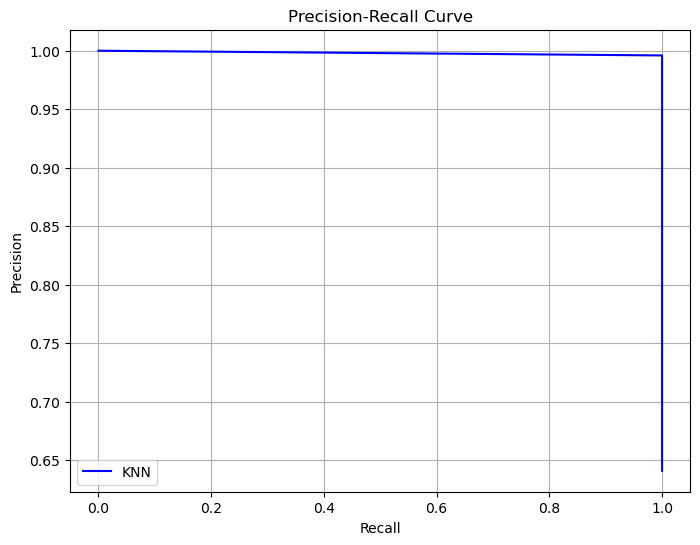

In [131]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_proba)

#Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label='KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


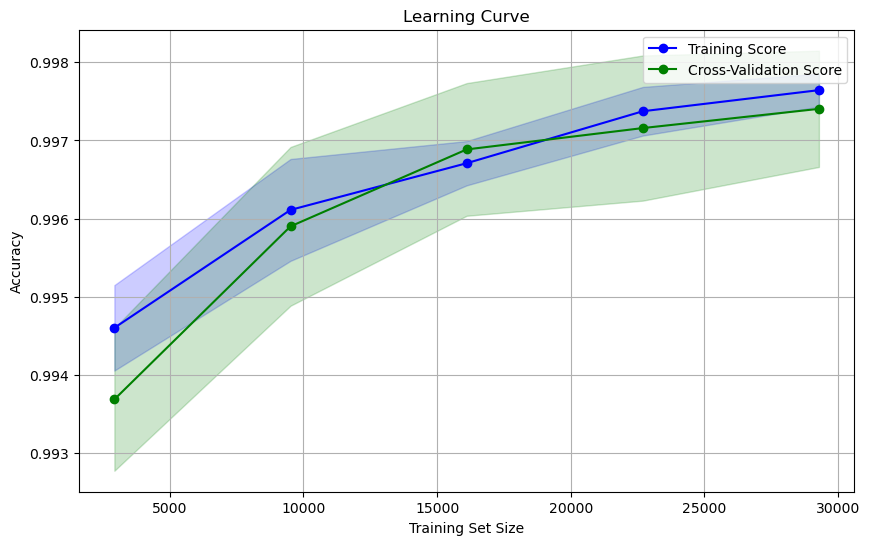

In [134]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(knn, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

#learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-Validation Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid()
plt.show()


# SVM

In [140]:
from sklearn.svm import SVC


X = df.drop(columns=['label', 'FILENAME', 'URL', 'Domain', 'TLD', 'Title'])  
y = df['label']

#Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#svm
svm = SVC(kernel='rbf', C=1, gamma='scale') 

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

#Classification report
print('Classification:')
print(classification_report(y_test, y_pred))



Accuracy: 1.00
Classification:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      7883
        True       1.00      1.00      1.00     14077

    accuracy                           1.00     21960
   macro avg       1.00      1.00      1.00     21960
weighted avg       1.00      1.00      1.00     21960



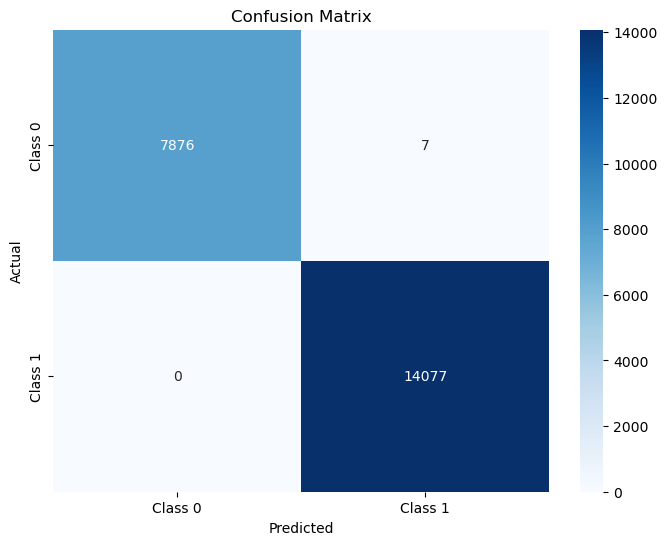

In [142]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


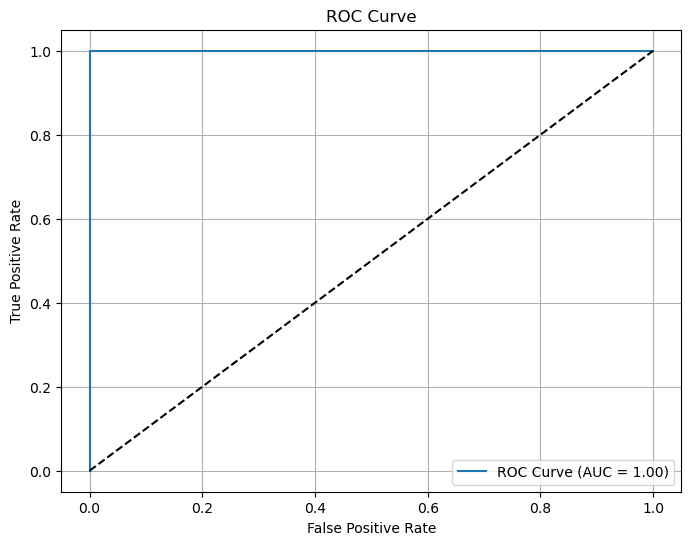

In [145]:
from sklearn.metrics import roc_curve, auc

#ROC curve
y_pred_prob = svm.decision_function(X_test)  
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


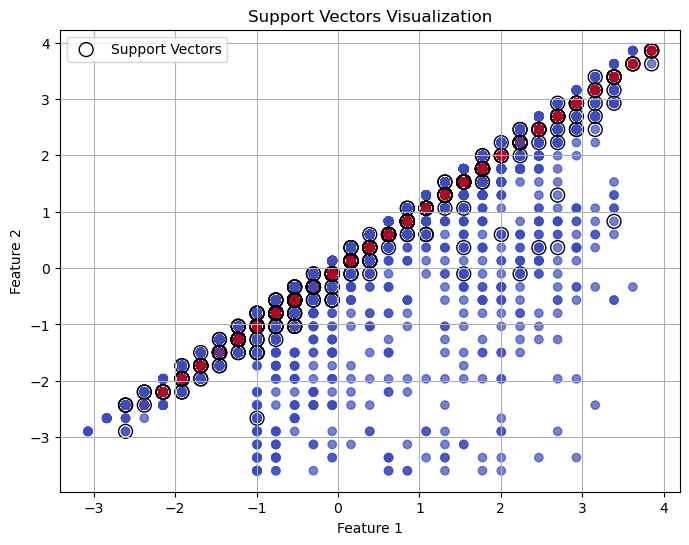

In [147]:
#support vectors
support_vectors = svm.support_vectors_

plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.title('Support Vectors Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()


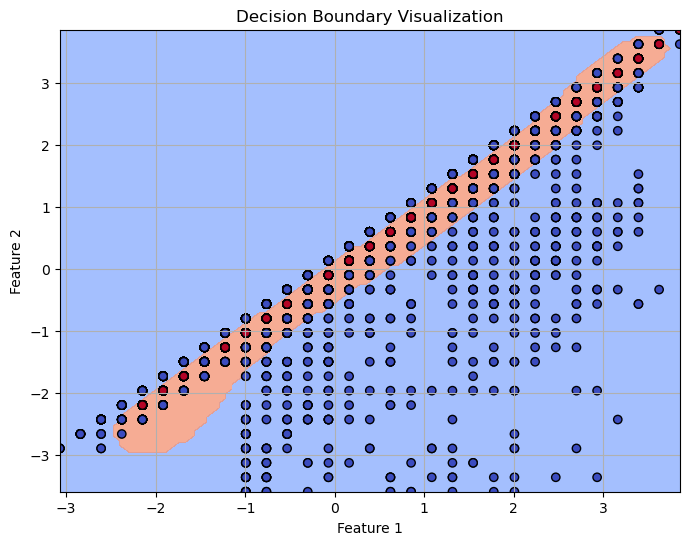

In [150]:
import numpy as np


X_train_2D = X_train[:, :2]
X_test_2D = X_test[:, :2]


svm_2D = SVC(kernel='rbf', C=1, gamma='scale')
svm_2D.fit(X_train_2D, y_train)

xx, yy = np.meshgrid(np.linspace(X_train_2D[:, 0].min(), X_train_2D[:, 0].max(), 100),
                     np.linspace(X_train_2D[:, 1].min(), X_train_2D[:, 1].max(), 100))

Z = svm_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, edgecolors='k', cmap='coolwarm')
plt.title('Decision Boundary Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()
